In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
import galport
import agama

In [122]:
# Load coordinates, velocities and actions

xv_act = np.load('../data/xv_act_0.npy')

t = np.arange(0, 600.125, 0.125)
xv = xv_act[:,:,0:6]
act = xv_act[:,:,6:9]

In [123]:
%%time
# Compute actions, angles, and frequencies for each orbit
# Integrating

pot_gal = agama.Potential(file='../data/Pot_non_CylSpline_t400.ini')
pot_gal_sym = agama.Potential(file='../data/Pot_axi_CylSpline_t400.ini')

Omega = np.load('../data/omega_p.npy')[400*8]
phi = -np.load('../data/phi_p.npy')[400*8]

# Rotate coordinates and velocities
xv0 = xv[:,400*8].copy()
x0 = xv0[:, 0].copy()
y0 = xv0[:, 1].copy()
vx0 = xv0[:, 3].copy()
vy0 = xv0[:, 4].copy()

xv0[:, 0] = x0*np.cos(phi) - y0*np.sin(phi)
xv0[:, 1] = x0*np.sin(phi) + y0*np.cos(phi)
xv0[:, 3] = vx0*np.cos(phi) - vy0*np.sin(phi)
xv0[:, 4] = vx0*np.sin(phi) + vy0*np.cos(phi)

OT_int = galport.OrbitTools(
    xv0=xv0,
    Tint=100,
    Nint=1000,
    potential=pot_gal,
    axisym_potential=pot_gal_sym,
    reverse=True,
    Omega=Omega
)

data_int = OT_int.calculate_actions(secular=True, sidereal=True)

100 orbits complete (186.9 orbits/s)
100 orbits complete (229.9 orbits/s)


CPU times: user 32 s, sys: 8.95 ms, total: 32 s
Wall time: 2.1 s


In [124]:
%%time
# Compute actions, angles, and frequencies for each orbit
# direcly from time series

OT = galport.OrbitTools(t=t, xv=xv, act=act)
data = OT.calculate_actions(secular=True)

CPU times: user 2.17 s, sys: 3 ms, total: 2.17 s
Wall time: 2.18 s


## Comparison actions for the individual orbit

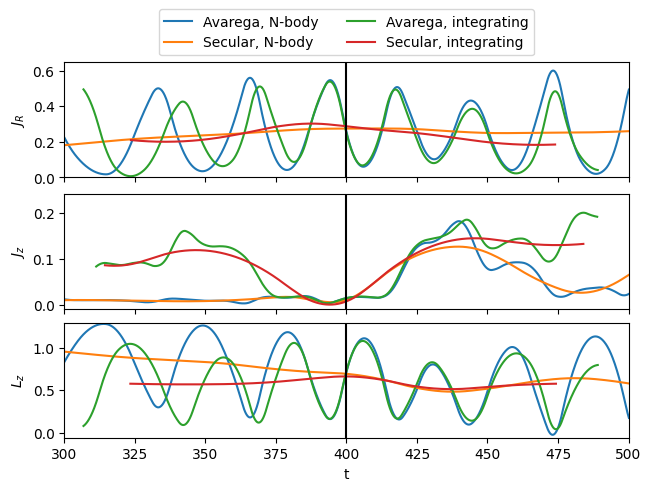

In [125]:
num = 7

# Actions

fig, axes = plt.subplots(3, constrained_layout=True, sharex=True)

# JR
JR = data[num,:,0]
JR_sec = data[num,:,9]
axes[0].plot(t, JR, label='Avarega, N-body')
axes[0].plot(t, JR_sec, label='Secular, N-body')
JR_int = data_int[num,:,0]
JR_sec_int = data_int[num,:,9]
axes[0].plot(OT_int.t + 400, JR_int, label='Avarega, integrating')
axes[0].plot(OT_int.t + 400, JR_sec_int, label='Secular, integrating')
axes[0].set_ylabel('$J_R$')
axes[0].set_xlim(300,500)
axes[0].plot([400,400], [-1,2], color='black')
axes[0].set_ylim(0, 1.2*np.nanmax(JR_int))
axes[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.0), ncol=2)

# Jz
Jz = data[num,:,1]
Jz_sec = data[num,:,10]
axes[1].plot(t, Jz)
axes[1].plot(t, Jz_sec)
Jz_int = data_int[num,:,1]
Jz_sec_int = data_int[num,:,10]
axes[1].plot(OT_int.t + 400, Jz_int)
axes[1].plot(OT_int.t + 400, Jz_sec_int)

axes[1].set_ylabel('$J_z$')
axes[1].set_xlim(300,500)
axes[1].plot([400,400], [-1,2], color='black')
axes[1].set_ylim(-0.01, 1.2*np.nanmax(Jz_int))

# Lz
Lz = data[num,:,2]
Lz_sec = data[num,:,11]
axes[2].plot(t, Lz)
axes[2].plot(t, Lz_sec)
Lz_int = data_int[7,:,2]
Lz_sec_int = data_int[7,:,11]
axes[2].plot(OT_int.t + 400, Lz_int)
axes[2].plot(OT_int.t + 400, Lz_sec_int)

axes[2].set_ylabel('$L_z$')
axes[2].set_xlabel('t')
axes[2].set_xlim(300,500)
axes[2].plot([400,400], [-1,2], color='black')
axes[2].set_ylim(np.nanmin(Lz_int)-0.1, 1.2*np.nanmax(Lz_int))

plt.show()

# Comparison of the set of orbits

In [126]:
# Actions and frequencies at the middle of integretion time

n_t = (len(OT_int.t) // 2)

JR_int = data_int[:,n_t,0]
Jz_int = data_int[:,n_t,1]
Lz_int = data_int[:,n_t,2]

JR_sec_int = data_int[:,n_t,9]
Jz_sec_int = data_int[:,n_t,10]
Lz_sec_int = data_int[:,n_t,11]

kappa_int = data_int[:,n_t,6]
omegaz_int = data_int[:,n_t,7]
Omega_int = data_int[:,n_t,8]

kappa_sec_int = data_int[:,n_t,12]
omegaz_sec_int = data_int[:,n_t,13]
Omega_sec_int = data_int[:,n_t,14]

# Action and angle at the moment of time t=400

t = 400
n_t = int(t)*8

JR = data[:,n_t,0]
Jz = data[:,n_t,1]
Lz = data[:,n_t,2]

JR_sec = data[:,n_t,9]
Jz_sec = data[:,n_t,10]
Lz_sec = data[:,n_t,11]

kappa = data[:,n_t,6]
omegaz = data[:,n_t,7]
Omega = data[:,n_t,8]

kappa_sec = data[:,n_t,12]
omegaz_sec = data[:,n_t,13]
Omega_sec = data[:,n_t,14]

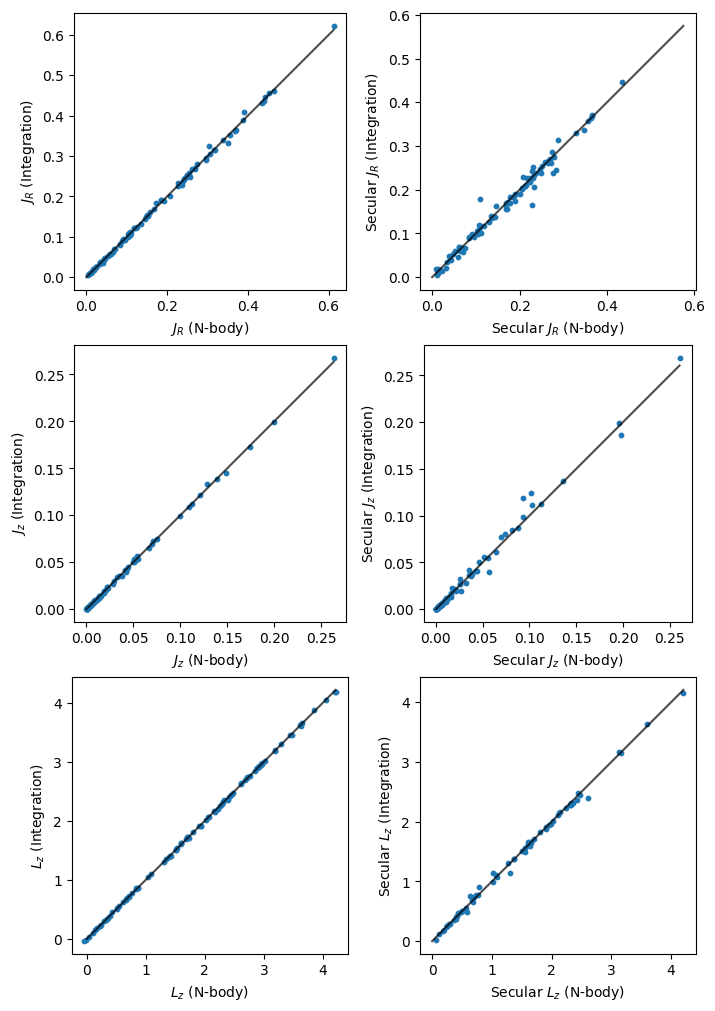

In [127]:
# Comparison actions from n-body time-series and time-series from integrating in potential

def plot_comparison(ax, x, y, x_label, y_label):
    ax.set_aspect('equal')
    ax.plot([0, np.nanmax(x)], [0.,np.nanmax(x)], color='black', alpha=0.7)
    ax.scatter(x, y, s=10)
    ax.set_xlabel(f'{x_label}')
    ax.set_ylabel(f'{y_label}')


    
fig, axes = plt.subplots(3, 2, figsize=(7,10), constrained_layout=True)

plot_comparison(axes[0,0], JR, JR_int, '$J_R$ (N-body)', '$J_R$ (Integration)')
plot_comparison(axes[0,1], JR_sec, JR_sec_int, 'Secular $J_R$ (N-body)', 'Secular $J_R$ (Integration)')
plot_comparison(axes[1,0], Jz, Jz_int, '$J_z$ (N-body)', '$J_z$ (Integration)')
plot_comparison(axes[1,1], Jz_sec, Jz_sec_int, 'Secular $J_z$ (N-body)', 'Secular $J_z$ (Integration)')
plot_comparison(axes[2,0], Lz, Lz_int, '$L_z$ (N-body)', '$L_z$ (Integration)')
plot_comparison(axes[2,1], Lz_sec, Lz_sec_int, 'Secular $L_z$ (N-body)', 'Secular $L_z$ (Integration)')
plt.show()

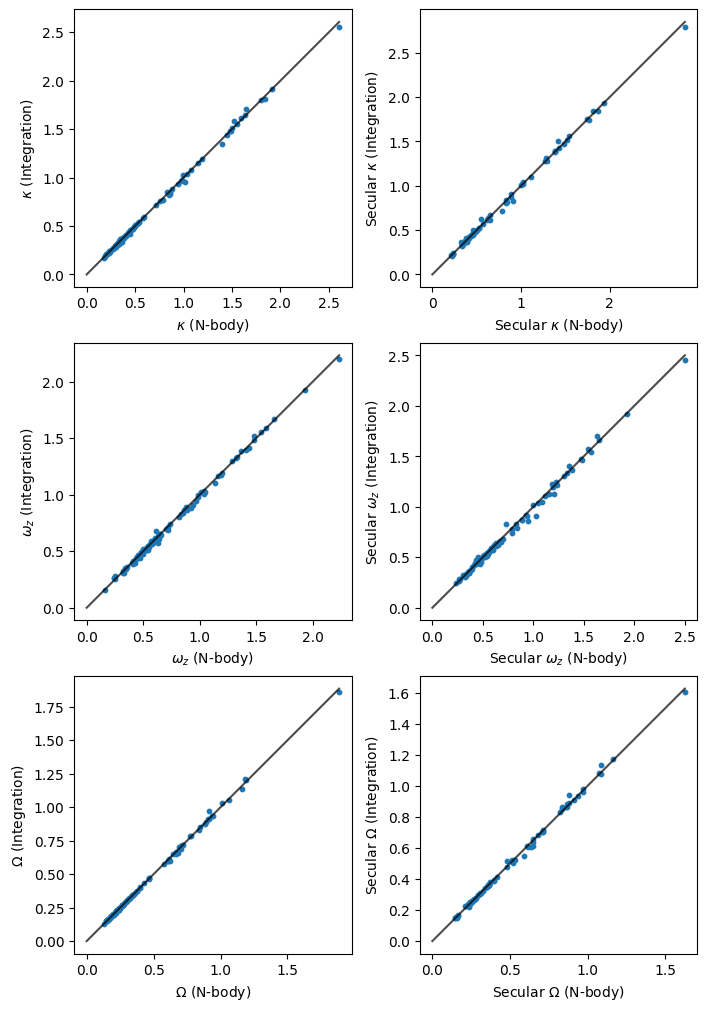

In [128]:
fig, axes = plt.subplots(3, 2, figsize=(7,10), constrained_layout=True)

plot_comparison(axes[0,0], kappa, kappa_int, '$\\kappa$ (N-body)', '$\\kappa$ (Integration)')
plot_comparison(axes[0,1], kappa_sec, kappa_sec_int, 'Secular $\\kappa$ (N-body)', 'Secular $\\kappa$ (Integration)')
plot_comparison(axes[1,0], omegaz, omegaz_int, '$\\omega_z$ (N-body)', '$\\omega_z$ (Integration)')
plot_comparison(axes[1,1], omegaz_sec, omegaz_sec_int, 'Secular $\\omega_z$ (N-body)', 'Secular $\\omega_z$ (Integration)')
plot_comparison(axes[2,0], Omega, Omega_int, '$\\Omega$ (N-body)', '$\\Omega$ (Integration)')
plot_comparison(axes[2,1], Omega_sec, Omega_sec_int, 'Secular $\\Omega$ (N-body)', 'Secular $\\Omega$ (Integration)')
plt.show()

## Comparison with frequency analysis naif

In [129]:
freq_naif = OT.naif_frequency()

kappa_naif = np.abs(freq_naif[:,0])
omegaz_naif = np.abs(freq_naif[:,1])
Omega_naif = freq_naif[:,2]

Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...
Frequency  1  - Peak not found in first shot. Refining...


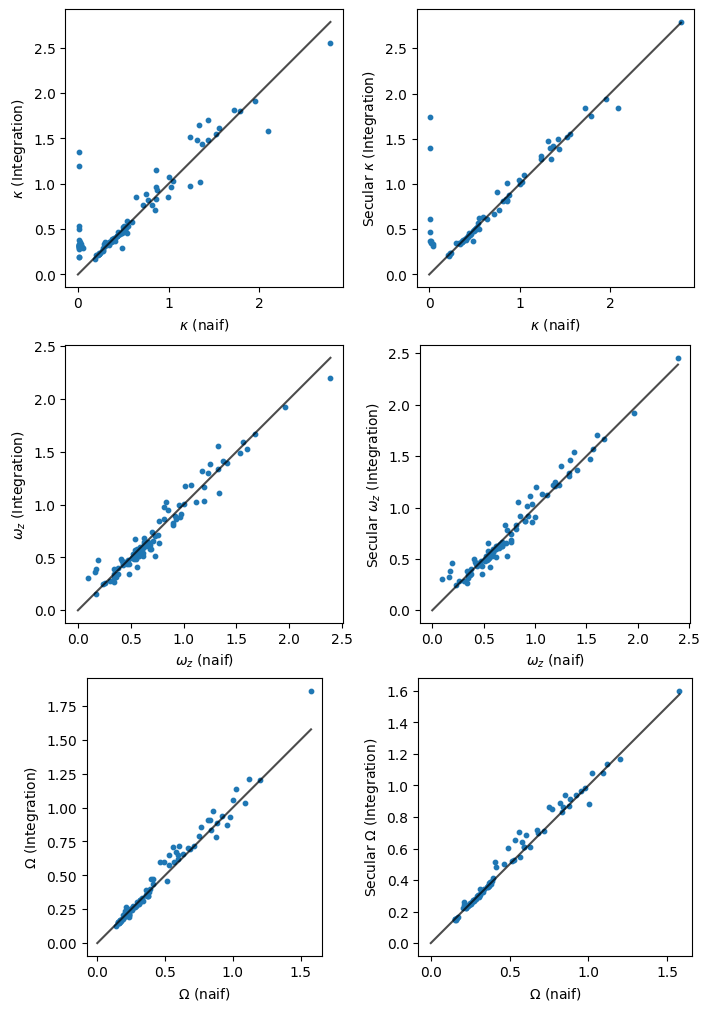

In [130]:
fig, axes = plt.subplots(3, 2, figsize=(7,10), constrained_layout=True)

plot_comparison(axes[0,0], kappa_naif, kappa_int, '$\\kappa$ (naif)', '$\\kappa$ (Integration)')
plot_comparison(axes[0,1], kappa_naif, kappa_sec_int, '$\\kappa$ (naif)', 'Secular $\\kappa$ (Integration)')
plot_comparison(axes[1,0], omegaz_naif, omegaz_int, '$\\omega_z$ (naif)', '$\\omega_z$ (Integration)')
plot_comparison(axes[1,1], omegaz_naif, omegaz_sec_int, '$\\omega_z$ (naif)', 'Secular $\\omega_z$ (Integration)')
plot_comparison(axes[2,0], Omega_naif, Omega_int, '$\\Omega$ (naif)', '$\\Omega$ (Integration)')
plot_comparison(axes[2,1], Omega_naif, Omega_sec_int, '$\\Omega$ (naif)', 'Secular $\\Omega$ (Integration)')
plt.show()